<a href="https://colab.research.google.com/github/urtbest86/MLOps/blob/master/211015_%EC%A7%84%ED%96%89%EC%A4%91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## GitHub에서 데이터셋 가져오기



In [ ]:
from google.colab import files
import os
DATA_PATH="https://raw.githubusercontent.com/urtbest86/MLOps/master/result_train_dataset.csv"
df = pd.read_csv(DATA_PATH)
df

,Date,Mean Temperature(°C),Minimum Temperature(°C),Maximum Temperature(°C),Precipitation(mm),Mean Wind Speed (m/s),Minimum Relative Humidity(%),Mean Relative Humidity(%),Duration of Sunshine(hr),Mean Surface Temperature(°C),Minimum Grass Temperature(°C),Cumulative Precipitation (mm),Mosquito Value
0,2021-08-31,20.5,18.1,23.1,77.4,2.3,77,93.3,0.0,21.2,17.8,78.2,82.0
1,2021-08-30,24.2,21.2,27.7,0.0,1.4,57,77.5,1.1,25.3,19.0,0.0,82.6
2,2021-08-29,23.7,21.9,26.3,0.9,1.6,65,82.6,1.0,24.3,19.1,0.9,79.3
3,2021-08-28,23.6,19.7,28.2,0.0,1.8,57,80.4,3.8,25.1,17.1,0.0,83.0
4,2021-08-27,22.4,20.4,25.5,0.9,1.3,67,83.5,0.0,23.1,17.6,0.9,79.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006,2016-05-05,18.9,10.2,26.9,7.5,1.7,17,50.8,10.9,20.0,3.6,17.0,24.4
1007,2016-05-04,15.7,10.2,20.6,0.0,5.1,28,46.6,12.8,16.6,8.9,0.0,25.6
1008,2016-05-03,12.9,8.9,17.6,27.0,4.9,72,86.1,0.0,14.8,8.5,27.0,30.4
1009,2016-05-02,21.1,16.5,28.4,16.5,2.2,33,64.5,7.5,24.4,12.1,43.5,27.4


In [ ]:
DATA_PATH="https://raw.githubusercontent.com/urtbest86/MLOps/master/result_test_dataset.csv"
test = pd.read_csv(DATA_PATH)
test

,Date,Mean Temperature(°C),Minimum Temperature(°C),Maximum Temperature(°C),Precipitation(mm),Mean Wind Speed (m/s),Minimum Relative Humidity(%),Mean Relative Humidity(%),Duration of Sunshine(hr),Mean Surface Temperature(°C),Minimum Grass Temperature(°C),Cumulative Precipitation (mm),Mosquito Value
0,2021-10-14,19.7,17.4,23.9,0.0,2.0,54,73.6,6.1,20.9,13.8,0.0,54.0
1,2021-10-13,19.6,14.9,25.2,0.0,2.4,52,66.6,9.0,19.3,11.0,0.0,43.2
2,2021-10-12,17.9,15.8,21.3,0.0,3.3,53,67.1,3.0,18.2,13.1,0.0,51.0
3,2021-10-11,15.2,12.6,17.8,0.3,2.2,67,78.6,1.7,18.0,12.3,0.3,63.1
4,2021-10-10,19.9,14.9,24.3,14.2,2.2,80,89.0,0.0,20.6,14.3,14.5,59.7
5,2021-10-09,20.9,18.5,24.1,0.4,2.3,72,83.5,1.9,20.5,16.4,14.6,61.1
6,2021-10-08,18.8,17.5,20.0,3.5,1.7,85,91.3,0.0,19.8,15.1,3.9,61.1
7,2021-10-07,19.4,17.9,21.9,4.6,1.9,74,85.5,0.0,20.6,15.2,8.1,73.9
8,2021-10-06,18.8,17.9,21.7,6.4,2.8,83,91.5,1.2,20.2,16.4,11.0,65.5
9,2021-10-05,23.6,21.7,26.5,0.0,3.3,65,82.4,1.5,23.2,20.8,0.0,58.4


In [ ]:
train=df.sample(frac=0.8)
val=df.sample(frac=0.2)

In [ ]:
mean = train.mean(axis=0)
train -= mean
std = train.std(axis=0)
train /= std

test -= mean
test /= std

val-=mean
val/=std

train_data_set = train.values
x_train = train_data_set[:, 2:-1].astype(float)
y_train = train_data_set[:, -1].astype(float)

test_data_set = test.values
x_test = test_data_set[:, 2:-1].astype(float)
y_test = test_data_set[:, -1].astype(float)

val_data_set = val.values
x_val = val_data_set[:, 2:-1].astype(float)
y_val = val_data_set[:, -1].astype(float)

### 모델 구성

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(1024, input_dim = 10, activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(1))

### 모델 학습과정 설정

In [ ]:
model.compile(loss='mse', optimizer='adam',metrics=['mae'])

### 모델 학습 + 학습과정 및 결과보기

In [ ]:
hist=model.fit(x_train, y_train, epochs=20, batch_size=4,validation_data=(x_val,y_val))

Epoch 1/20
203/203 [==============================] - 2s 10ms/step - loss: 0.7103 - mae: 0.6723 - val_loss: 0.5787 - val_mae: 0.5994
Epoch 2/20
203/203 [==============================] - 2s 9ms/step - loss: 0.6674 - mae: 0.6503 - val_loss: 0.5346 - val_mae: 0.5916
Epoch 3/20
203/203 [==============================] - 2s 9ms/step - loss: 0.6086 - mae: 0.6156 - val_loss: 0.5247 - val_mae: 0.5665
Epoch 4/20
203/203 [==============================] - 2s 9ms/step - loss: 0.6072 - mae: 0.6098 - val_loss: 0.5563 - val_mae: 0.5884
Epoch 5/20
203/203 [==============================] - 2s 9ms/step - loss: 0.5791 - mae: 0.5939 - val_loss: 0.5235 - val_mae: 0.5691
Epoch 6/20
203/203 [==============================] - 2s 9ms/step - loss: 0.5579 - mae: 0.5857 - val_loss: 0.4967 - val_mae: 0.5325
Epoch 7/20
203/203 [==============================] - 2s 8ms/step - loss: 0.5721 - mae: 0.5957 - val_loss: 0.5775 - val_mae: 0.5556
Epoch 8/20
203/203 [==============================] - 2s 9ms/step - loss: 0

### mae와 val_mae 비교

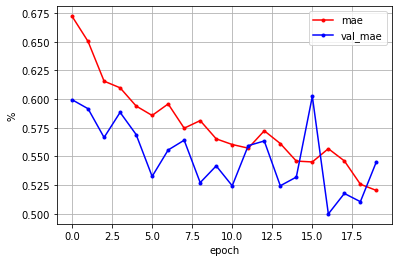

In [ ]:
import matplotlib.pyplot as plt

y_mae = hist.history['mae']
y_val_mae = hist.history['val_mae']#x_len = np.arange(len(y_loss)) 

x_len = np.arange(20)
plt.plot(x_len, y_mae, marker='.', c='red', label="mae")
plt.plot(x_len, y_val_mae, marker='.', c='blue', label="val_mae")

# plt.plot(x_len, hist.history['val_loss'], marker='.', c='green', label="val_mse")
# plt.plot(x_len, hist.history['val_mae'], marker='.', c='black', label="val_mae")

plt.legend(loc='upper right')
plt.grid()
#plt.xlim(0,150)
plt.xlabel('epoch')
plt.ylabel('%')
plt.show()

### mse(loss)와 val_mse 비교

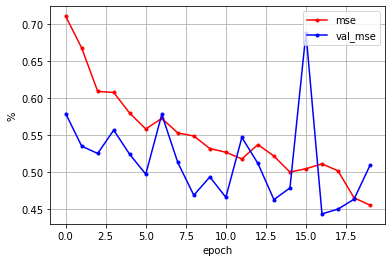

In [ ]:
import matplotlib.pyplot as plt

y_mse = hist.history['loss']
y_val_mse = hist.history['val_loss']#x_len = np.arange(len(y_loss)) 

x_len = np.arange(20)
plt.plot(x_len, y_mse, marker='.', c='red', label="mse")
plt.plot(x_len, y_val_mse, marker='.', c='blue', label="val_mse")

# plt.plot(x_len, hist.history['val_loss'], marker='.', c='green', label="val_mse")
# plt.plot(x_len, hist.history['val_mae'], marker='.', c='black', label="val_mae")

plt.legend(loc='upper right')
plt.grid()
#plt.xlim(0,150)
plt.xlabel('epoch')
plt.ylabel('%')
plt.show()

### mae와 mse 비교

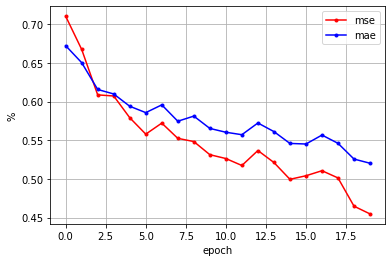

In [ ]:
import matplotlib.pyplot as plt

y_mse = hist.history['loss']
y_mae = hist.history['mae']#x_len = np.arange(len(y_loss)) 

x_len = np.arange(20)
plt.plot(x_len, y_mse, marker='.', c='red', label="mse")
plt.plot(x_len, y_mae, marker='.', c='blue', label="mae")

# plt.plot(x_len, hist.history['val_loss'], marker='.', c='green', label="val_mse")
# plt.plot(x_len, hist.history['val_mae'], marker='.', c='black', label="val_mae")

plt.legend(loc='upper right')
plt.grid()
#plt.xlim(0,150)
plt.xlabel('epoch')
plt.ylabel('%')
plt.show()

In [ ]:
print('## training loss and acc ##')
print(hist.history['loss'])
print(hist.history['mae'])

## training loss and acc ##
[0.710334300994873, 0.6674166321754456, 0.6086428165435791, 0.6072301864624023, 0.5791337490081787, 0.5578967332839966, 0.5721490383148193, 0.5524672865867615, 0.5483033061027527, 0.5313227772712708, 0.5263630151748657, 0.5173561573028564, 0.5367099642753601, 0.5212444067001343, 0.4994962811470032, 0.5040874481201172, 0.5106115937232971, 0.5012797117233276, 0.46474605798721313, 0.4547519087791443]
[0.6722840070724487, 0.6502892971038818, 0.6156446933746338, 0.6098314523696899, 0.5939468741416931, 0.5857119560241699, 0.5957478880882263, 0.5746038556098938, 0.5812082886695862, 0.5652911067008972, 0.5603395700454712, 0.5571689605712891, 0.5723189115524292, 0.5612069368362427, 0.5458885431289673, 0.5451349020004272, 0.5567055344581604, 0.5460449457168579, 0.5256723165512085, 0.5202630162239075]


### 모델 평가

In [ ]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

2/2 [==============================] - 0s 8ms/step - loss: 0.1691 - mae: 0.3422
## evaluation loss and_metrics ##
[0.1690613180398941, 0.34221136569976807]


In [ ]:
print(model.predict(x_test))
print(y_test)

[[-0.0524286 ]
 [-0.23973231]
 [-0.05570927]
 [-0.39813322]
 [ 0.37585157]
 [ 0.43791357]
 [ 0.13460177]
 [ 0.1585661 ]
 [ 0.4374216 ]
 [ 0.6068874 ]
 [ 0.59283215]
 [ 0.21945691]
 [-0.00173495]
 [ 0.00242324]
 [ 0.30475628]
 [ 0.14388177]
 [-0.03705432]
 [-0.08291815]
 [ 0.41985545]
 [ 0.3216022 ]
 [ 0.2958091 ]
 [ 0.371344  ]
 [ 0.4132643 ]
 [ 1.0097157 ]
 [ 0.5359587 ]
 [ 0.9519314 ]
 [ 0.41946125]
 [ 1.593307  ]
 [ 0.4208621 ]
 [ 0.55026346]
 [ 0.91578156]
 [ 1.5841877 ]
 [ 0.38976523]
 [ 0.44156352]
 [ 0.7268221 ]
 [ 0.44250956]
 [ 0.46524355]
 [ 0.20050879]
 [ 0.89421886]
 [ 0.7491242 ]
 [ 0.5697995 ]
 [ 0.80618554]
 [ 0.55406314]
 [ 0.40301087]]
[ 0.1322128  -0.26712681  0.02128513  0.4686934   0.34297538  0.39474162
  0.39474162  0.86803302  0.55743554  0.29490672  0.20616458  0.2690236
  0.15809593  0.37995127  0.6055042   0.49457653  0.45760064  0.4686934
  0.73122222  0.74231499  0.74231499  0.4686934   0.41692716  0.805174
  0.89021855  0.61659696  0.7053391   1.01593658  1

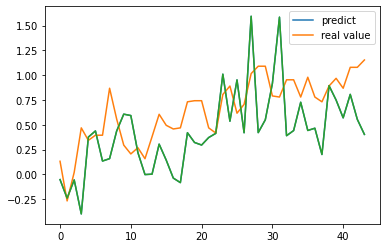

In [ ]:
plt.plot(model.predict(x_test),label='predict')
plt.plot(y_test, label='real value')
plt.plot(model.predict(x_test))
# plt.plot(model.predict(x_test)-y_test)
#plt.xlim(0,20)
plt.legend()
plt.show()